<a href="https://colab.research.google.com/github/Marcin19721205/WSBNeuronowe/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wprowadzenie

Tu zajmiemy się automatyzacją procesu budowania sieci i jej szkolenia z pomocą biblioteki Keras, co bardzo ułatwia prowadzenie eksperymentów.

In [1]:
import tensorflow as tf
import tensorflow.keras as krs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Wczytanie danych

przez część tego notebooka będziemy pracować ze zbiorem danych znanym z poprzedniego modułu. Będzie można łatwo porównać wyniki działania sieci oraz złożoność procesu jej uczenia.

In [4]:
# Wczytanie pliku
data = pd.read_csv('sample_data/Zad2.csv')

# Podgląd danych
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,y
0,1.782902,-0.514597,-0.613121,1.887671,0.882484,-0.710170,-1.012459,1.844640,-1.467145,-1.988939,1
1,0.954982,-1.424915,0.892841,-0.823253,-0.518931,-0.122799,-0.731305,2.180099,-2.912802,-0.134576,0
2,0.442498,1.101695,0.876030,0.599936,-1.822219,0.097915,1.885007,-2.298382,1.596145,0.396029,1
3,-1.089093,0.978857,2.155756,-1.537207,-1.486984,0.674720,0.016652,0.103296,-1.536952,0.813603,1
4,-0.363242,1.733437,-0.910804,0.837368,0.315033,-0.109148,-0.308504,1.954324,-1.577190,-0.869934,0


In [5]:
X = data.drop(columns=['y'])   # usuń kolumnę y → zostają tylko cechy (features)
y = data.y                     # kolumna y jako target (etykieta)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # dane wejściowe i target
    train_size=0.8,       # 80% danych do treningu, 20% do testu
    random_state=123      # stały seed → powtarzalny podział
)

#Budowanie sieci w Keras

Proces budowania sieci w Keras-ie składa się z kilku kroków:

Utworzeie modelu i dodawanie do niego kolejnych warstw o określonej specyfikacji.
Dodanie funkcji kosztu, optymalizaotra i metryk.
Dodanie ew. dodatków jak wywołania zwrotne (ang. callback) - jak np. przerywanie uczenia gdy trafność spada, etc.
Skompilowanie modelu.

#Ad 1. - tworzenie modelu i dodawanie warstw

Istnieje szereg warstw sieci, które można wykorzystać:

Warstwy "gęste" (ang. dense) - taki rodzaj warstw, z jakimi zwykle mamy do czynienia. W pełni połączone z wejściami i wyjściami. Musimy podać:
liczbę neuronów
aktywację
{python}
model.add( keras.layers.Dense(# neurons, activation) )
Ta warstwa wykona mnożenie wag, dokładnie tak jak robiliśmy to w kodzie pisanym "ręcznie": (X * W + b) - warstwa alokuje wagi (W) oraz biasy (b). W przypadku pierwszej warstwy trzeba podać wymiarowość danych wejścowych, tzn. ile cech posiadają dane.

Dropout - "warstwa" odpowiadająca za losowe wyłączanie neuronów w procesie uczenia (tak, jak to pokazano na wykładach).
Batch notmalization - warstwa odpowiadająca za adaptacyjną normalizację wejść do sieci.
Conv1D, Conv2D, etc. - warstwy konwolucyjne, o których będzie mowa później.
LSTM,RNN, GRU, etc. - warstwy rekurencyjne, o których będzie mowa później.

#Ad. 2. & Ad. 4. - dodanie funkcji kosztu, optymalizatora i metryk / kompilacja modelu

Każdą funkcję kosztu, albo optymalizator lub metrykę, można dodać za pomocą tekstu (string) albo przekazać obiekt odpowiedniego typu. Tekstami można się posługiwać w relatywnie prostych przypadkach, gdy używamy elementów wchodzących w skład biblioteki. Obiekty można przekazywać, gdy używamy niestandardowych rozwiazań.

Przykład wykorzystania tekstu w kompilacji modelu:

model.compile(
    optimizer='adam',
    loss='binary_cross_entropy',
    metrics=['accuracy', 'precision'])
Przykład wykorzystania obiektów

model.compile(
    optimizer=krs.optimizers.Adam(),
    loss=krs.losses.BinaryCrossentropy(),
    metrics=[krs.metrics.Accuracy(), krs.metrics.Precision()])

#Ad 3. - Dodanie ew. dodatków jak wywołania zwrotne

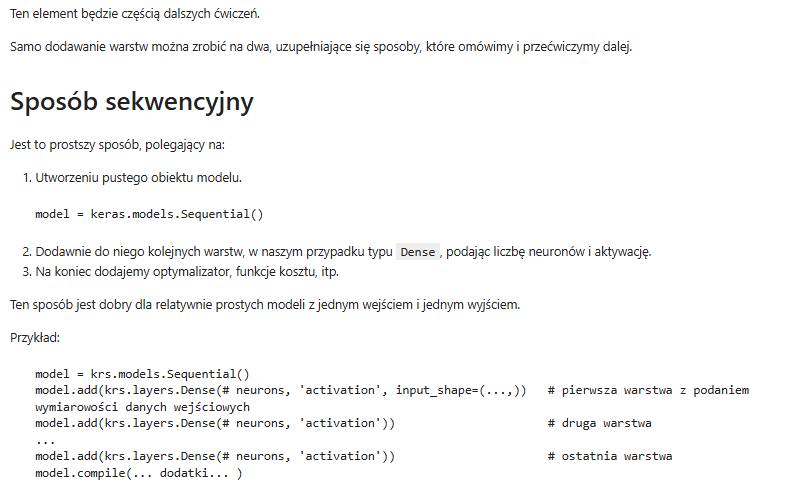

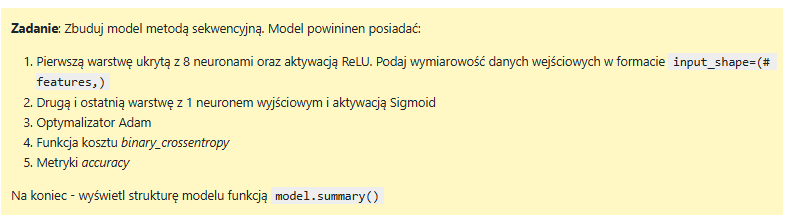

In [7]:
n_features = X_train.shape[1]                   # liczba cech wejściowych (tu powinno wyjść 10)

model1 = krs.models.Sequential()                # inicjalizacja pustego modelu sekwencyjnego

model1.add(
    krs.layers.Dense(
        8,                                      # 8 neuronów w warstwie ukrytej
        activation='relu',                      # aktywacja ReLU
        input_shape=(n_features,)               # wymiar wejścia: (#features,)
    )
)

model1.add(
    krs.layers.Dense(
        1,                                      # 1 neuron wyjściowy
        activation='sigmoid'                    # aktywacja Sigmoid (klasyfikacja binarna)
    )
)

model1.compile(
    optimizer='adam',                           # optymalizator Adam
    loss='binary_crossentropy',                 # funkcja kosztu: binary_crossentropy
    metrics=['accuracy']                        # metryka: accuracy
)

model1.summary()                                # wypisanie struktury modelu


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Sprawdzenie poprawności wyniku:

In [10]:
assert model1.count_params() == 97              # sprawdzamy liczbę wszystkich parametrów w sieci

assert model1.input_shape == (None, 10)         # wejście ma 10 cech (None = liczba próbek dowolna)

assert model1.layers[0].weights[0].shape == (10, 8)
# macierz wag 1. warstwy: 10 wejść × 8 neuronów

assert model1.layers[0].activation == krs.activations.relu
# 1. warstwa używa ReLU

assert model1.layers[1].weights[0].shape == (8, 1)
# macierz wag warstwy wyjściowej: 8 wejść × 1 neuron

assert model1.layers[1].activation == krs.activations.sigmoid
# warstwa wyjściowa używa Sigmoid


Sposób funkcyjny

In [13]:
n_features = X_train.shape[1]                   # liczba cech wejściowych

inp = krs.layers.Input(shape=(n_features,))     # wejście do sieci (10 cech)
h1  = krs.layers.Dense(8, activation='relu')(inp)   # warstwa ukryta: 8 neuronów + ReLU
out = krs.layers.Dense(1, activation='sigmoid')(h1) # warstwa wyjściowa: 1 neuron + Sigmoid

model2 = krs.Model(inputs=inp, outputs=out)    # złożenie całości w model funkcyjny

model2.compile(
    optimizer='adam',                           # optymalizator Adam
    loss='binary_crossentropy',                 # funkcja kosztu
    metrics=['accuracy']                        # metryka accuracy
)

model2.summary()                               # wypisanie architektury


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

Sprawdzenie poprawności wyniku

In [18]:
assert model2.count_params() == 97                      # całkowita liczba parametrów = 97

assert model2.input.shape == (None, 10)     # wejście: 10 cech

assert model2.layers[1].weights[0].shape == (10, 8)     # wagi warstwy 1: 10 wejść → 8 neuronów
assert model2.layers[1].activation == krs.activations.relu   # aktywacja ReLU w warstwie 1

assert model2.layers[2].weights[0].shape == (8, 1)      # wagi warstwy wyjściowej: 8 wejść → 1 neuron
assert model2.layers[2].activation == krs.activations.sigmoid  # aktywacja Sigmoid

#Szkolenie modelu

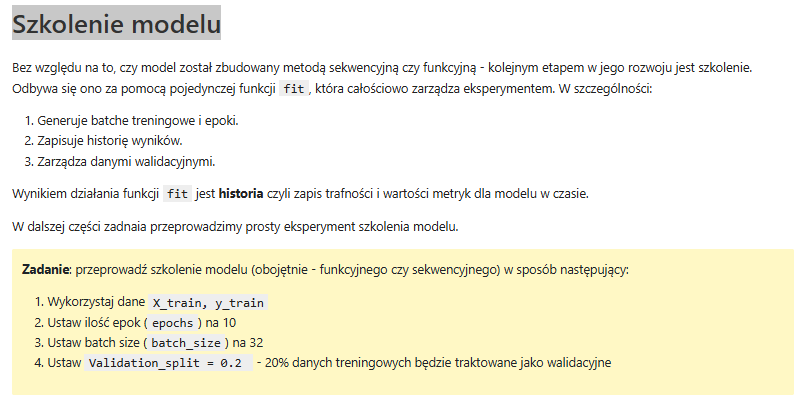

In [19]:
history = model2.fit(
    X_train, y_train,        # dane treningowe
    epochs=10,               # liczba epok
    batch_size=32,           # wielkość batcha
    validation_split=0.2,    # 20% danych treningowych → walidacja
    verbose=1                # pokazuj postęp
)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7801 - loss: 0.5202 - val_accuracy: 0.8400 - val_loss: 0.4361
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8164 - loss: 0.4471 - val_accuracy: 0.8600 - val_loss: 0.3770
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8363 - loss: 0.4076 - val_accuracy: 0.8788 - val_loss: 0.3420
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3592 - val_accuracy: 0.8863 - val_loss: 0.3208
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.3520 - val_accuracy: 0.8888 - val_loss: 0.3080
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3331 - val_accuracy: 0.8900 - val_loss: 0.2994
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3291 - val_accuracy: 0.8888 - val_loss: 0.2927
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.3186 - val_accuracy: 0.

#wykres accuracy

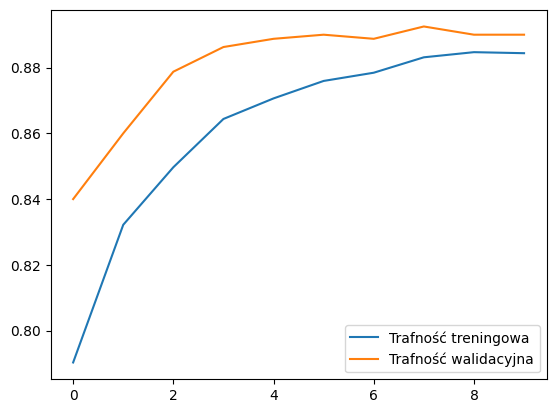

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']             # dokładność treningowa
val_acc = history.history['val_accuracy']     # dokładność walidacyjna

plt.plot(acc, label='Trafność treningowa')    # wykres treningu
plt.plot(val_acc, label='Trafność walidacyjna') # wykres walidacji
plt.legend()                                  # legenda
plt.show()                                    # pokaż wykres


#wykres loss

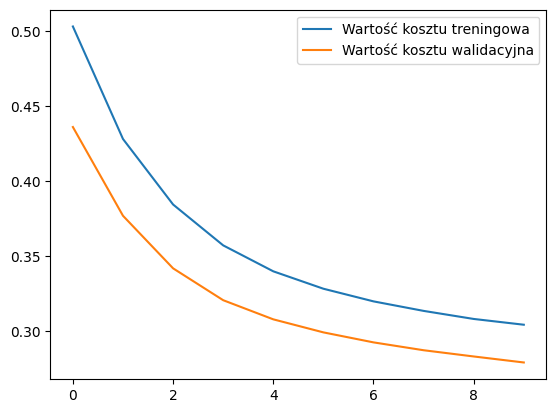

In [21]:
loss = history.history['loss']                # koszt treningowy
val_loss = history.history['val_loss']        # koszt walidacyjny

plt.plot(loss, label='Wartość kosztu treningowa')   # wykres treningu
plt.plot(val_loss, label='Wartość kosztu walidacyjna') # wykres walidacji
plt.legend()                                  # legenda
plt.show()                                    # pokaż wykres


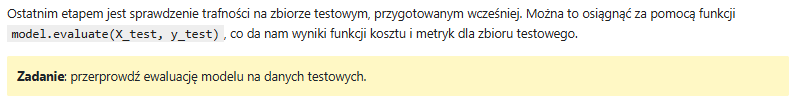

In [22]:
model2.evaluate(X_test, y_test)   # oblicza loss i accuracy na danych testowych


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.2815  


[0.27614378929138184, 0.8899999856948853]

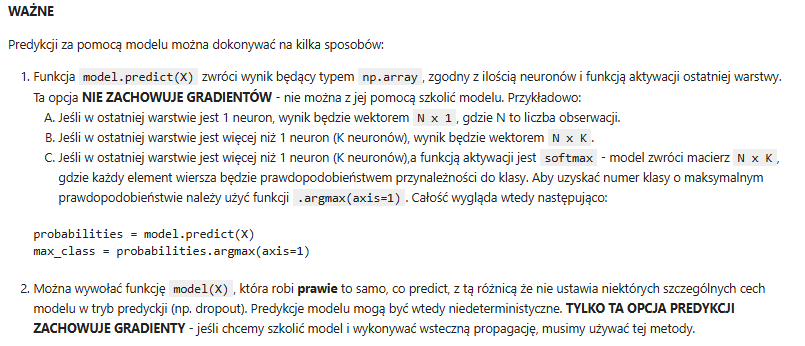

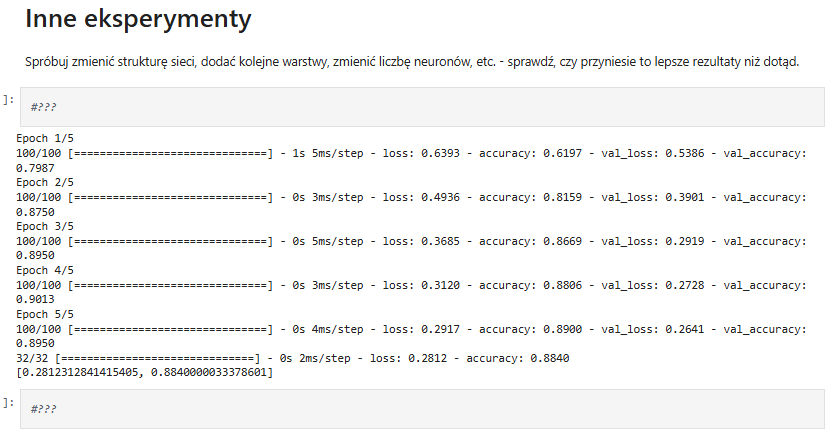

In [23]:
model3 = krs.models.Sequential()                       # nowy model sekwencyjny

model3.add(krs.layers.Dense(16, activation='relu',
                            input_shape=(X_train.shape[1],)))  # 1. warstwa: 16 neuronów + ReLU

model3.add(krs.layers.Dense(8, activation='relu'))     # 2. warstwa: 8 neuronów + ReLU

model3.add(krs.layers.Dense(1, activation='sigmoid'))  # wyjście: 1 neuron + Sigmoid (klasa 0/1)

model3.compile(
    optimizer='adam',                                  # optymalizator Adam
    loss='binary_crossentropy',                        # funkcja kosztu
    metrics=['accuracy']                               # metryka accuracy
)

history3 = model3.fit(                                 # trening modelu eksperymentalnego
    X_train, y_train,                                  # dane treningowe
    epochs=5,                                          # liczba epok
    batch_size=32,                                     # wielkość batcha
    validation_split=0.2,                              # 20% na walidację
    verbose=1                                          # pokazuj przebieg
)

model3.evaluate(X_test, y_test)                        # ewaluacja na zbiorze testowym


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6931 - loss: 0.6107 - val_accuracy: 0.8325 - val_loss: 0.4346
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.3968 - val_accuracy: 0.8788 - val_loss: 0.3414
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8755 - loss: 0.3397 - val_accuracy: 0.8800 - val_loss: 0.3059
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8816 - loss: 0.3000 - val_accuracy: 0.8875 - val_loss: 0.2876
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2969 - val_accuracy: 0.8888 - val_loss: 0.2767
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8784 - loss: 0.2790  


[0.27253714203834534, 0.8849999904632568]

Wykres trafności (accuracy)

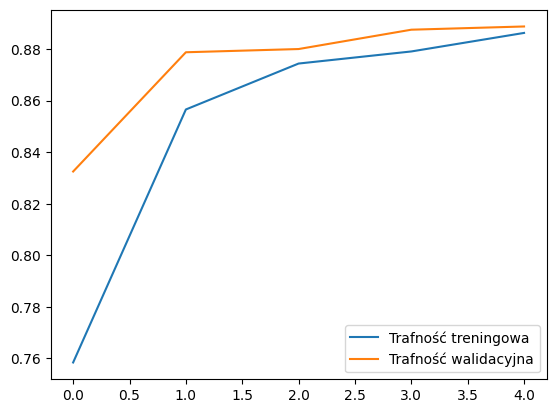

In [24]:
plt.plot(history3.history['accuracy'], label='Trafność treningowa')       # accuracy train
plt.plot(history3.history['val_accuracy'], label='Trafność walidacyjna')  # accuracy val
plt.legend()                                                              # legenda
plt.show()                                                                # pokaż wykres


Wykres kosztu (loss)

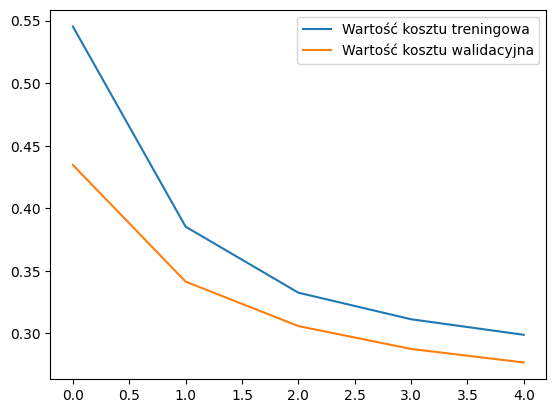

In [25]:
plt.plot(history3.history['loss'], label='Wartość kosztu treningowa')      # loss train
plt.plot(history3.history['val_loss'], label='Wartość kosztu walidacyjna') # loss val
plt.legend()                                                               # legenda
plt.show()                                                                 # pokaż wykres
